<a href="https://colab.research.google.com/github/bellottisofia/Innovation_Adoption_Parameters/blob/main/dissatisfied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
df = pd.read_excel('/content/dataset_clean.xlsx')

consider the questions:

Q15: Have you tried to drive an electric car yourself?
Yes-->1
No-->0
Don’t know-->0


Q16: Which of the following statements about electric car suits you the best?
If I had an EV, it would be my only car-->1
If I had an EV, it would be a supplement to a petrol or diesel car-->1
I would never buy an EV-->0
don't know-->0

In [12]:
df[['Q15','Q16']]

,Q15,Q16
0,No,1
1,No,99999997
2,No,1
3,No,3
4,No,99999997
...,...,...
6103,Yes,2
6104,No,1
6105,Yes,1
6106,Yes,1


In [13]:
# Define a mapping dictionary
mapping1 = {'Yes':1, 'No':0, "I don't know":0}

# Apply the mapping to the target variable
df['Q15'] = df['Q15'].map(mapping1)

In [14]:
# Define a mapping dictionary
mapping2 = {1: 1, 2: 1, 3: 0, 99999997: 0}

# Apply the mapping to the target variable
df['Q16'] = df['Q16'].map(mapping2)

In [15]:
df[['Q15','Q16']]

,Q15,Q16
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
6103,1,1
6104,0,1
6105,1,1
6106,1,1


We want to identify the dissatisfied individuals; we define them as those who have tried an electric car in the past but would not buy one.

In [16]:
df['dissatisfied'] = (df['Q15'] == 1) & (df['Q16'] == 0)

In [17]:
df[['Q15','Q16','dissatisfied']]

,Q15,Q16,dissatisfied
0,0,1,False
1,0,0,False
2,0,1,False
3,0,0,False
4,0,0,False
...,...,...,...
6103,1,1,False
6104,0,1,False
6105,1,1,False
6106,1,1,False


In [18]:
df.to_csv("dataset_dissatisfied.csv", index=False)

In [19]:
df_Denmark=df.loc[df['Country']=='Denmark']
df_Norway=df.loc[df['Country']=='Norway']
df_Germany=df.loc[df['Country']=='Germany']
df_Hungary=df.loc[df['Country']=='Hungary']

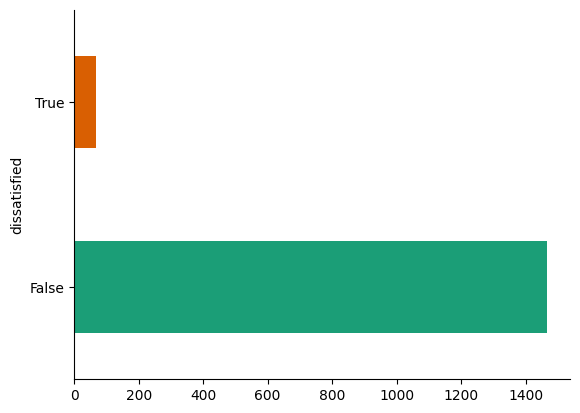

In [20]:
#plot the number of people that are dissatisfied by EV (for which dissatsfied is True)
import seaborn as sns
df_Denmark.groupby('dissatisfied').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

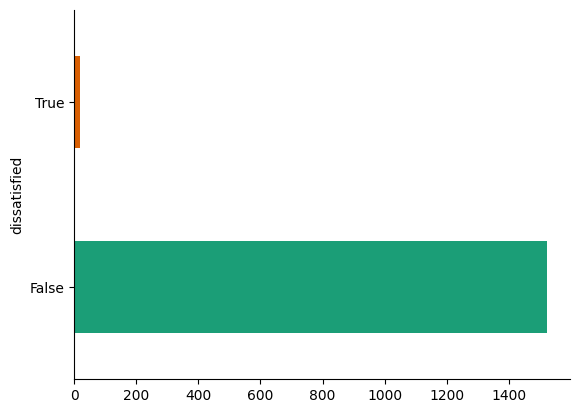

In [21]:
df_Hungary.groupby('dissatisfied').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

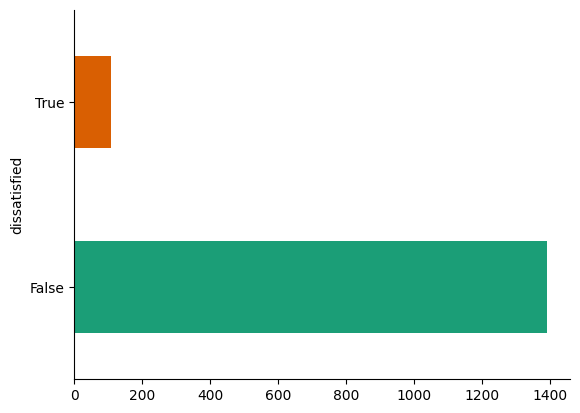

In [22]:
df_Norway.groupby('dissatisfied').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

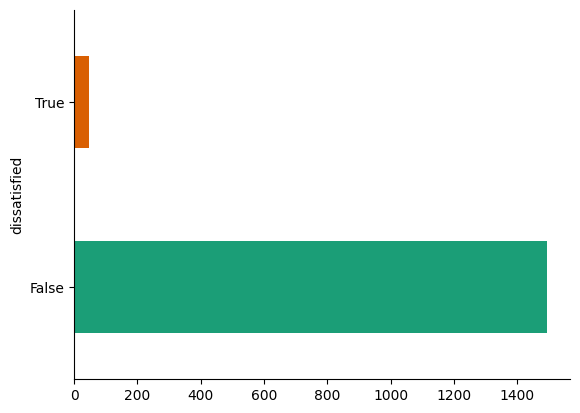

In [23]:
df_Germany.groupby('dissatisfied').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
df_NL=pd.read_csv('/content/NL_clean.csv')

In [25]:
# Define a mapping dictionary
mapping3 = {1:1, 2:0, 99999997:0}

# Apply the mapping to the target variable
df_NL['Q15'] = df_NL['Q15'].map(mapping3)

In [26]:
df_NL['Q16'] = df_NL['Q16'].map(mapping2)

In [27]:
df_NL['dissatisfied'] = (df_NL['Q15'] == 1) & (df_NL['Q16'] == 0)

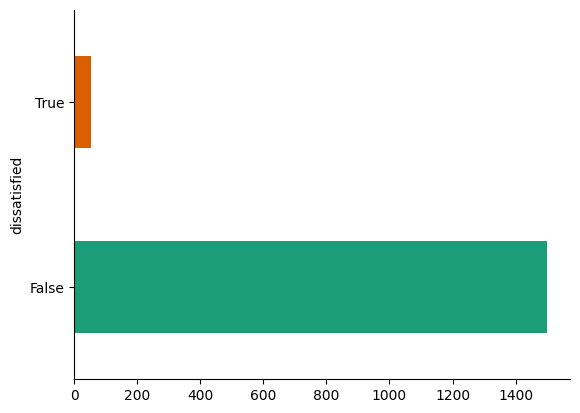

In [28]:
df_NL.groupby('dissatisfied').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
df_NL.to_csv("NL_dissatisfied.csv", index=False)

In [32]:
df = pd.read_csv('/content/dataset_dissatisfied.csv')

In [33]:
km_map = {
     "I don't know":np.nan,
    'Less than 1.000 km': 'less than 4.999',
     '1.000-4.9999':'less than 4.999',
    '5.000-9.999': '5.000-9.999'  ,
    '10.000-19.999':'10.000-19.999',
    '20.000-29.999': '20.000-29.999' ,

     '30.000-39.999' : 'more than 30.000',


    '40.000-49.999' :'more than 30.000' ,
     '50.000 or more' : 'more than 30.000',
}



In [34]:
df['km_year'] = df['Q7'].map(km_map)
df.drop(columns=['Q7'], inplace=True)

In [35]:
df_Germany=df.loc[df['Country']=='Germany']

In [36]:
# mean
population_Germany_year = df_Germany.groupby(['Lftcat', 'km_year'])['dissatisfied'].mean().reset_index()

# Rename column from 'dissatisfied' to 'delta_year'
population_Germany_year.rename(columns={'dissatisfied': 'delta_year'}, inplace=True)
# Add combined column combinata 'population'
population_Germany_year['population'] = population_Germany_year['Lftcat'] + '_' + population_Germany_year['km_year'].astype(str)

# Select columns and save in CSV format
population_Germany_year[['population', 'delta_year']].to_csv('population_Germany_year.csv', index=False)

